1. [Notebook goal](#notebookgoal)
2. [PC What ?](#pca)
3. [Let's code](#letscode)
4. [PCA with sklearn](#sklearn)
5. [Bonus](#bonus)

# 1. Notebook goal <a name="notebookgoal"></a>
In this notebook we'll focus on implementing PCA  with little help possible from sklearn; You'll see how easy it is; And don't worry we'll compare the results ;)

# 2. PC What ? <a name="pca"></a>
Principal component analysis (PCA) allows us to summarize and to visualize the information in a data set containing individuals/observations described by multiple inter-correlated quantitative variables. Each variable could be considered as a different dimension. If you have more than 3 variables in your data sets, it could be very difficult to visualize a multi-dimensional hyperspace.

Principal component analysis is used to extract the important information from a multivariate data table and to express this information as a set of few new variables called principal components. These new variables correspond to a linear combination of the originals. The number of principal components is less than or equal to the number of original variables.

The information in a given data set corresponds to the total variation it contains. The goal of PCA is to identify directions (or principal components) along which the variation in the data is maximal.

In other words, PCA reduces the dimensionality of a multivariate data to two or three principal components, that can be visualized graphically, with minimal loss of information [[sthda](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)].

# 2. Let's code <a name="letscode"></a> 

These are the libraries we need, nothing special ¯\\\_(ツ)\_/¯

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


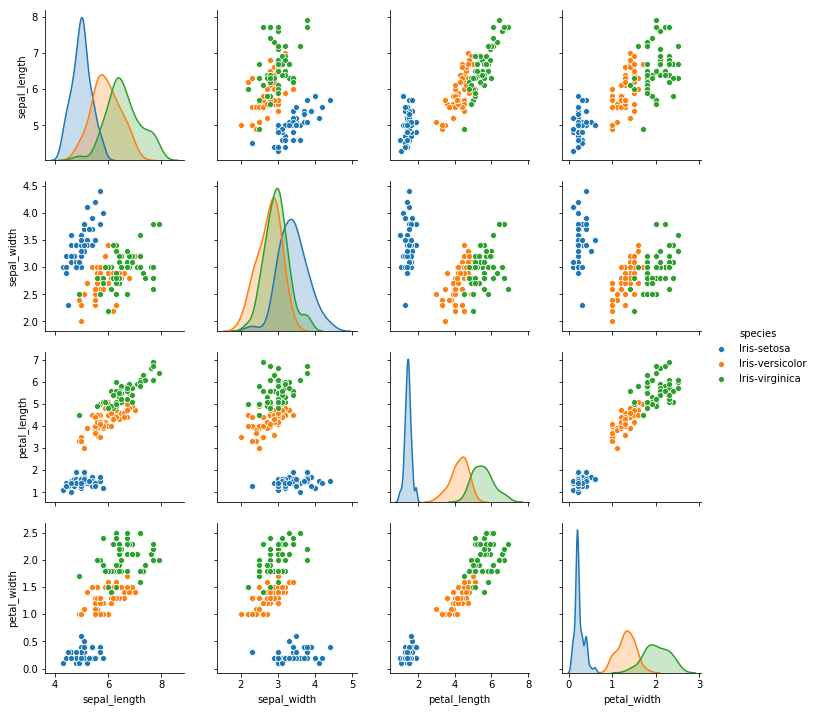

In [5]:
sns.pairplot(df, hue = 'species')

In [6]:
# We're seperating the species column
species = df["species"].tolist()
X = df.drop("species", 1)

In [7]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

**Note**: instead of standardizing the data manually, we can use sklearns StandardScaler 
> StandardScaler().fit_transform(X)

In [8]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

**Note**: instead of calculating the correlation matrix manually we can just use 
> X.corr()

Text(0.5, 1.0, 'Correlation matrix')

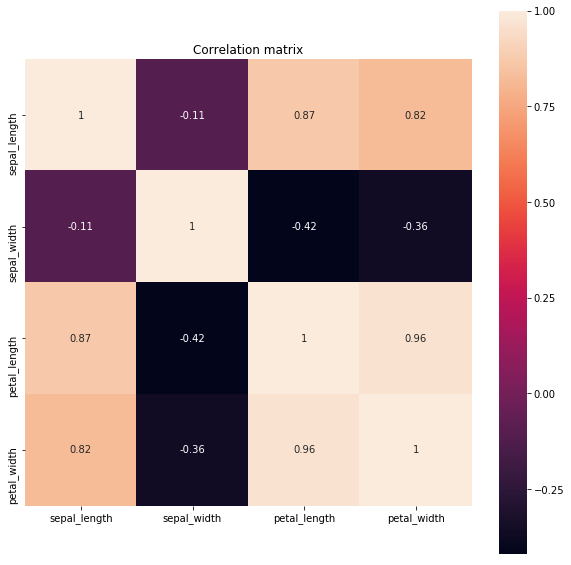

In [9]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

The next step is to extract the eign values and their respective eigen vectors.
(
It's important to have the sorted list of eigen values / eigen vectors) .

We'll try to calculate them using two methods :

In [10]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]))

In [11]:
# method2
np.linalg.eig(X_corr)

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Notice how the direction of some vectors is not the same in the two outputs. Despite that,our analysis will [still be valid](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers)

In [12]:
np.sum(eig_values)

4.0

Wooooooo, the sum of the eigen values is equal to number of variables. we're going in the right direction ;)

Text(0.5, 0, 'Dimensions')

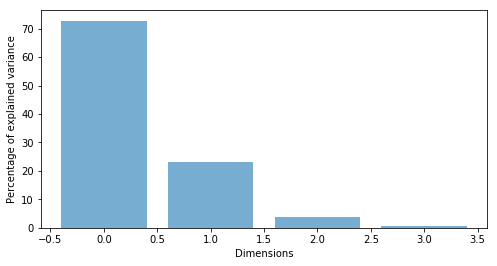

In [13]:
# plotting the variance explained by each PC 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

This bar chart shows us that the first two dimensions will be enough to represent the data.

So let's find these principal components:

In [14]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

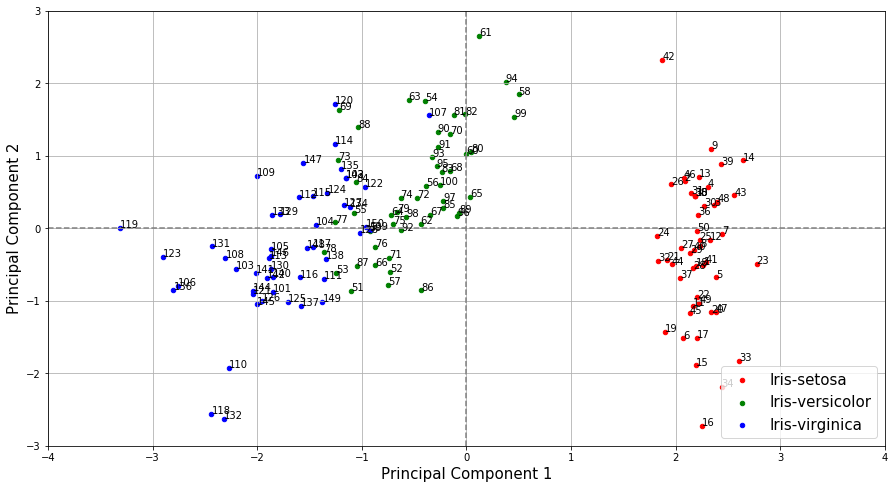

In [15]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)

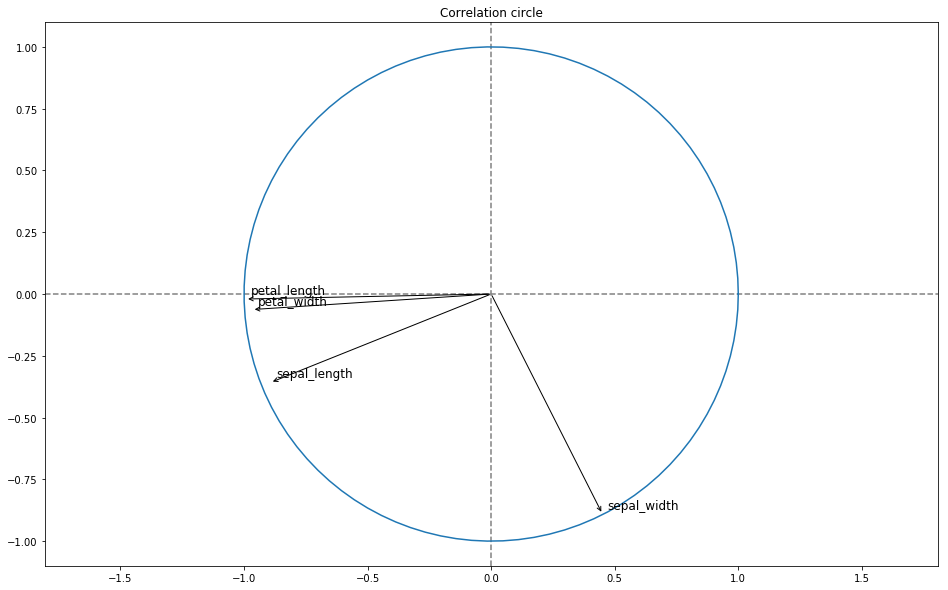

In [16]:
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):
        x = np.corrcoef(pc1,X[X.columns[i]])[0,1]
        y = np.corrcoef(pc2,X[X.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(X.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    
plot_correlation_circle(pc1,pc2)

Well it seems that:
* petal length & petal width are the main things that characterizes the data
* virginica has relatively bigger petals while setosa has the smallest
* a small group of setosa have a relatively big sepal_width

# 4. PCA with sklearn <a name="sklearn"></a>

In this section we'll use the famous sklearn library instead

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

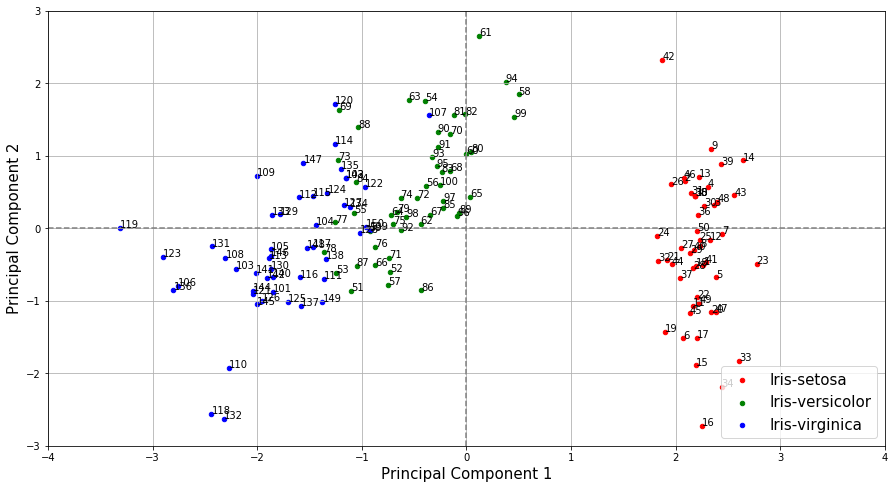

In [18]:
X = df.drop("species", 1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

The same plot, isn't it ?

# 4. Bonus <a name="bonus"></a>

This Free DLC consists of plotting the data in 3D.

Remember that in our case plotting the data in 2D is sufficient.

In [19]:
import plotly.express as px

In [20]:
pc3 = result[:,2]

In [21]:
pcs = pd.DataFrame(list(zip(pc1, pc2, pc3, species)),columns =['pc1', 'pc2', 'pc3', 'species']) 
fig = px.scatter_3d(pcs, x='pc1', y='pc2', z='pc3',color='species')
fig.show()

That's it, i'll be happy to receive your feedbacks :D